In [1]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


In [2]:
# before congestion pricing dataset
df_before = pd.read_csv("data/violations_before.csv")
df_before.head()

,violation_id,vehicle_id,first_occurrence,last_occurrence,violation_status,violation_type,bus_route_id,violation_latitude,violation_longitude,stop_id,stop_name,bus_stop_latitude,bus_stop_longitude,violation_georeference,bus_stop_georeference,first_date_only,first_time_only,last_date_only,last_time_only
0,453199364,21944709e605608ed8c5467b85d101f1d35aa589850cc1...,2025-01-04 13:19:59,2025-01-04 14:15:28,EXEMPT - COMMERCIAL UNDER 20,MOBILE DOUBLE PARKED,M101,40.798618,-73.939526,405181,3 AV/E 116 ST,40.797798,-73.940040,POINT (-73.939526 40.798618),POINT (-73.94004 40.797798),2025-01-04,13:19:59,2025-01-04,14:15:28
1,453077336,9a80c56e9783ef2cb59276cfdb6b2ec025289cf2d017c9...,2025-01-04 15:18:12,2025-01-04 15:27:06,DRIVER/VEHICLE INFO MISSING,MOBILE BUS STOP,M15+,40.796899,-73.937919,401738,2 AV/E 125 ST,40.802473,-73.933855,POINT (-73.937919 40.796899),POINT (-73.933855 40.802473),2025-01-04,15:18:12,2025-01-04,15:27:06
2,453072301,e2a9484b77b3923c4cef2c32a6f1138fbf4ed0ec521d37...,2025-01-04 17:13:07,2025-01-04 17:16:40,VIOLATION ISSUED,MOBILE BUS STOP,M101,40.794568,-73.944642,403416,LEXINGTON AV/E 116 ST,40.798149,-73.942022,POINT (-73.944642 40.794568),POINT (-73.942022 40.798149),2025-01-04,17:13:07,2025-01-04,17:16:40
3,453052476,5f00dd05f4d96d72c3f7e24a5e915def23fa82d26366ca...,2025-01-04 14:24:17,2025-01-04 14:27:24,VIOLATION ISSUED,MOBILE BUS STOP,M15+,40.703220,-74.010570,403754,WATER ST/WALL ST,40.705045,-74.007758,POINT (-74.01057 40.70322),POINT (-74.007758 40.705045),2025-01-04,14:24:17,2025-01-04,14:27:24
4,452953656,421d84e2d1638a96cad98d531e96b5c9d5406dfc443b63...,2025-01-03 06:53:46,2025-01-03 07:23:53,EXEMPT - EMERGENCY VEHICLE,MOBILE DOUBLE PARKED,M101,40.842347,-73.935115,402740,AMSTERDAM AV/W 171 ST,40.841978,-73.935267,POINT (-73.935115 40.842347),POINT (-73.935267 40.841978),2025-01-03,06:53:46,2025-01-03,07:23:53


In [3]:
# convert firstdate col to datetime
df_before['first_date_only'] = pd.to_datetime(df_before['first_date_only'])

# Keep only 2024 and later
df_before= df_before[df_before['first_date_only'].dt.year == 2024]

# combine daily violations into month (count)
monthly_counts_before = (
    df_before.groupby(df_before['first_date_only'].dt.to_period('M'))['violation_id']
      .count()
      .reset_index()
)


monthly_counts_before.head(40)

,first_date_only,violation_id
0,2024-01,8491
1,2024-02,7432
2,2024-03,6995
3,2024-04,7135
4,2024-05,6416
5,2024-06,9502
6,2024-07,17379
7,2024-08,17857
8,2024-09,28495
9,2024-10,57741


In [4]:
# before congestion pricing dataset
df_after = pd.read_csv("data/violations_after.csv")
df_after.head()

,violation_id,vehicle_id,first_occurrence,last_occurrence,violation_status,violation_type,bus_route_id,violation_latitude,violation_longitude,stop_id,stop_name,bus_stop_latitude,bus_stop_longitude,violation_georeference,bus_stop_georeference,first_date_only,first_time_only,last_date_only,last_time_only
0,489741940,7feac037b62d591ffb1214e356157f3dd197fc22fee5bb...,2025-08-20 10:52:57,2025-08-20 11:16:57,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.815113,-73.955040,401458,AMSTERDAM AV/W 131 ST,40.816009,-73.954424,POINT (-73.95504 40.815113),POINT (-73.954424 40.816009),2025-08-20,10:52:57,2025-08-20,11:16:57
1,489741935,e9122b4e6dac9160ed4fca952a3815fe4c737bfc70cb97...,2025-08-20 23:35:29,2025-08-20 23:39:32,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.795630,-73.941683,402704,3 AV/E 109 ST,40.793765,-73.943005,POINT (-73.941683 40.79563),POINT (-73.943005 40.793765),2025-08-20,23:35:29,2025-08-20,23:39:32
2,489741747,de04d0589e26e7da94c192dff0be14d105abcc8342c87f...,2025-08-20 23:18:06,2025-08-20 23:24:10,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS LANE,M101,40.808403,-73.946993,402658,W 125 ST/ADAM C POWELL BLVD,40.808700,-73.947836,POINT (-73.946993 40.808403),POINT (-73.947836 40.8087),2025-08-20,23:18:06,2025-08-20,23:24:10
3,489741639,6d7caef8bf15e2bf8d46aa1e6dd8c0da1ae2fbc5b31ace...,2025-08-20 22:58:39,2025-08-20 23:02:18,EXEMPT - EMERGENCY VEHICLE,MOBILE DOUBLE PARKED,M101,40.842800,-73.934798,405069,AMSTERDAM AV/W 175 ST,40.843810,-73.934076,POINT (-73.934798 40.8428),POINT (-73.934076 40.84381),2025-08-20,22:58:39,2025-08-20,23:02:18
4,489741496,414bf604b556873481cb6a6fa325cef72d37bf7c168385...,2025-08-21 12:01:22,2025-08-21 14:40:41,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M42,40.747781,-73.969323,903046,E 41 ST/1 AV,40.747979,-73.969789,POINT (-73.96932254145938 40.74778115789982),POINT (-73.969789 40.747979),2025-08-21,12:01:22,2025-08-21,14:40:41


In [5]:
df_after['violation_status'].unique()

array(['EXEMPT - EMERGENCY VEHICLE', 'EXEMPT - BUS/PARATRANSIT',
       'EXEMPT - OTHER', 'TECHNICAL ISSUE/OTHER',
       'DRIVER/VEHICLE INFO MISSING', 'EXEMPT - COMMERCIAL UNDER 20',
       'VIOLATION ISSUED'], dtype=object)

In [6]:
# convert firstdate col to datetime
df_after['first_date_only'] = pd.to_datetime(df_after['first_date_only'])

# combine daily violations into month (count)
monthly_counts_after = (
    df_after.groupby(df_after['first_date_only'].dt.to_period('M'))['violation_id']
      .count()
      .reset_index()
)

monthly_counts_after = monthly_counts_after.iloc[:-1]
monthly_counts_after.head(12)

,first_date_only,violation_id
0,2025-01,41393
1,2025-02,37137
2,2025-03,52274
3,2025-04,59384
4,2025-05,64605
5,2025-06,67020
6,2025-07,64922


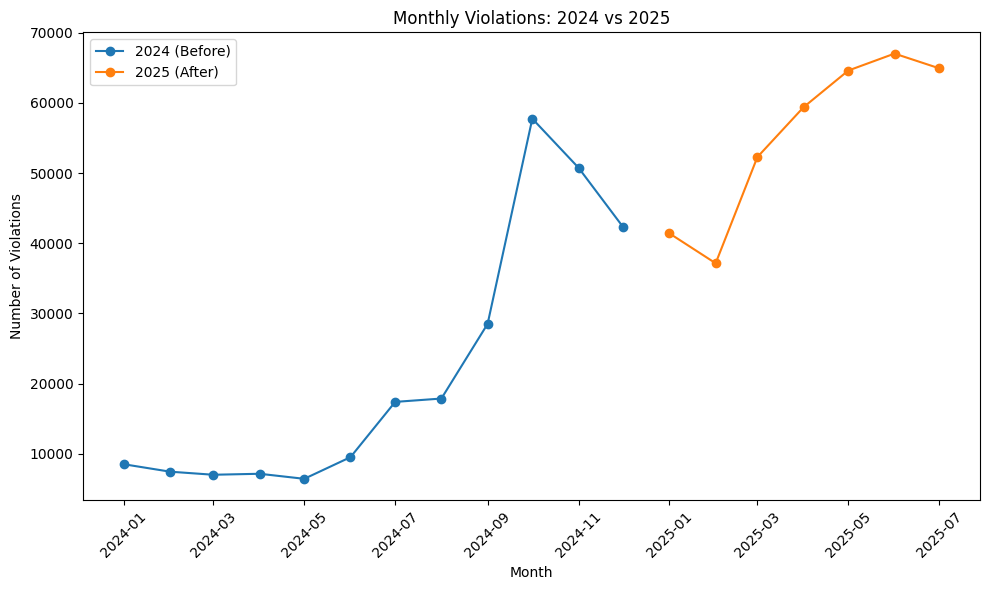

In [7]:
monthly_counts_before['first_date_only'] = monthly_counts_before['first_date_only'].dt.to_timestamp()
monthly_counts_after['first_date_only'] = monthly_counts_after['first_date_only'].dt.to_timestamp()

plt.figure(figsize=(10,6))
plt.plot(monthly_counts_before['first_date_only'], monthly_counts_before['violation_id'], marker='o', label='2024 (Before)')
plt.plot(monthly_counts_after['first_date_only'], monthly_counts_after['violation_id'], marker='o', label='2025 (After)')

plt.xticks(rotation=45)
plt.title("Monthly Violations: 2024 vs 2025")
plt.xlabel("Month")
plt.ylabel("Number of Violations")
plt.legend()
plt.tight_layout()
plt.show()

#Comparing the monthly violation, it showed that there is more violation after congestion pricing.
#Potential Factors: More exempt violation than issued ones, more cameras are implemented, 

In [8]:
#Spliting the violation status from Exempt and Violation Issued

#spliting before congestion pricing year 2024
df_2024_issued = df_before[df_before['violation_status'].str.contains("VIOLATION ISSUED", case=False, na=False)]
df_2024_exempt = df_before[df_before['violation_status'].str.contains("EXEMPT", case=False, na=False)]

In [9]:
#spliting before congestion pricing year 2024
df_2025_issued = df_after[df_after['violation_status'].str.contains("VIOLATION ISSUED", case=False, na=False)]
df_2025_exempt = df_after[df_after['violation_status'].str.contains("EXEMPT", case=False, na=False)]

In [10]:
#Compare the amount of monthly violation issued of 2024 to 2025 (before and after congestion pricing)
monthly_2024_issued = (
    df_2024_issued.groupby(df_2024_issued['first_date_only'].dt.to_period('M'))['violation_id']
                  .count()
                  .reset_index()
)
monthly_2025_issued = (
    df_2025_issued.groupby(df_2025_issued['first_date_only'].dt.to_period('M'))['violation_id']
                  .count()
                  .reset_index()
)

# Convert Period → string for plotting
monthly_2024_issued['first_date_only'] = monthly_2024_issued['first_date_only'].astype(str)
monthly_2025_issued['first_date_only'] = monthly_2025_issued['first_date_only'].astype(str)
monthly_2025_issued  = monthly_2025_issued.iloc[:-1]
monthly_2025_issued.head(12)

,first_date_only,violation_id
0,2025-01,22722
1,2025-02,19610
2,2025-03,27442
3,2025-04,32438
4,2025-05,34093
5,2025-06,34710
6,2025-07,32929


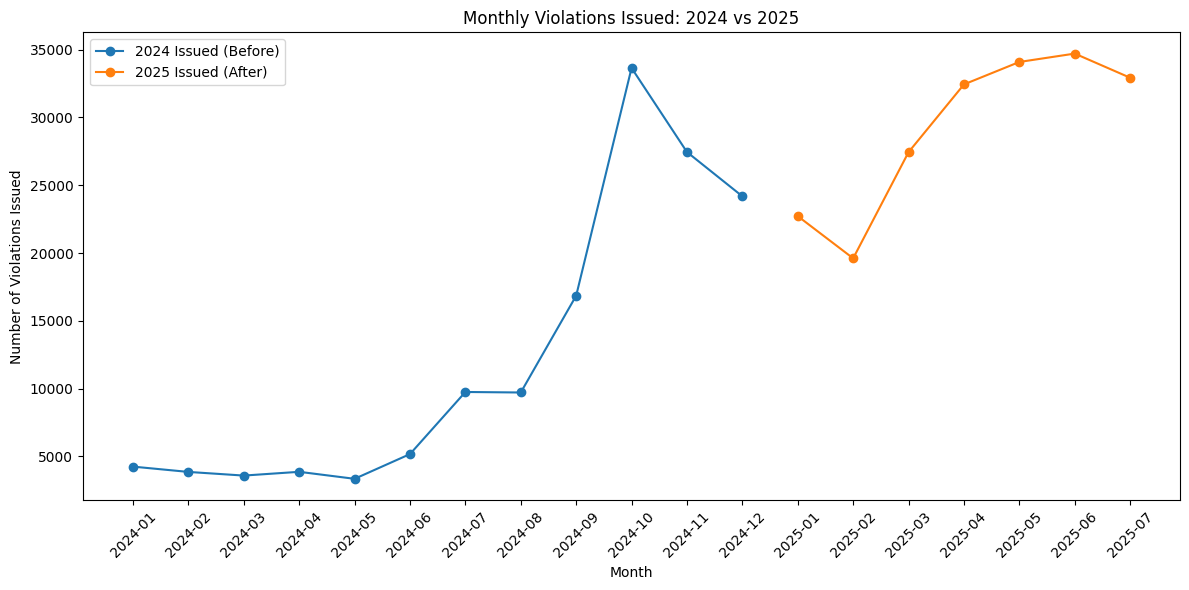

In [11]:
plt.figure(figsize=(12,6))

plt.plot(monthly_2024_issued['first_date_only'], monthly_2024_issued['violation_id'],
         marker='o', label="2024 Issued (Before)")

plt.plot(monthly_2025_issued['first_date_only'], monthly_2025_issued['violation_id'],
         marker='o', label="2025 Issued (After)")

plt.xticks(rotation=45)
plt.title("Monthly Violations Issued: 2024 vs 2025")
plt.xlabel("Month")
plt.ylabel("Number of Violations Issued")
plt.legend()
plt.tight_layout()
plt.show()

# After congestion pricing, more violations were tracked: 
# possible factor: increased in enforcement

If we compare the violations' amount in each month on the graph, the violations after congestion pricing seems higher.

Running a T-Test would determine if the difference between before and after is statistically different (Is the difference random or did something occurred that changed it?) Note: It doesn't neccessarily mean that congestion pricing caused the change.

In [ ]:
#select Jan–Jul 2024
jan_jul_2024 = monthly_2024_issued[
    monthly_2024_issued['first_date_only'].astype(str).between("2024-01", "2024-07")
]['violation_id']

#select Jan–Jul 2025
jan_jul_2025 = monthly_2025_issued[
    monthly_2025_issued['first_date_only'].astype(str).between("2025-01", "2025-07")
]['violation_id']

#run independent t-test
t_stat, p_val = ttest_ind(jan_jul_2024, jan_jul_2025, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: -10.041066443697138
p-value: 1.1272212126484257e-05


Null Hypothesis: No difference in the mean number of monthly violations issued between jan-jul24 and jan-jul25 
Alternative Hypothesis: There is a significant difference in the mean number of monthly violations issued between jan-jul24 and jan-jul25 

Result:
pvalue < 0.05 = There is a significant difference in the mean number of monthly violations issued between jan-jul24 and jan-jul25. It means the difference is unlikely to be just by random chance